# Iterated Prisioners Dilemma Tournament

## Group Project for COMP 3710

By: Mio Tanaka, Suraiya Khanda, Samar Houssami, Ben Davidson

This project uses [Jupyter Notebooks](https://jupyter.org), Python 3.7 and the [Alexrod-Python](https://github.com/Axelrod-Python) library to run, analyise and visualise an Iterated Prisioners Dilemma Tournament

## Import the axelrod library

In [16]:
import axelrod as axl
%matplotlib inline

## Prepare the tournament

In [30]:
axl.seed(0)

# players = [s() for s in axl.demo_strategies]
players = [axl.Cooperator(), axl.Defector(), 
           axl.TitForTat(), axl.Grudger(),
           axl.Random()]
tournament = axl.Tournament(players)
tournament.name = 'IPDP for COMP 3710'        # set the experiment name
tournament.turns = 200                        # set the number of turns
tournament.repetitions = 10                   # number of times to repeat
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 150.54it/s]


## Tournament 
{{tournament.name}}
Ran for {{tournament.turns}} turns and repeated {{tournament.repetitions}} times

In [31]:
print("The players were: ")
print(results.players)


print("\nTheir final ranking was: ")
print(results.ranked_names)


The players were: 
['Cooperator', 'Defector', 'Tit For Tat', 'Grudger', 'Random: 0.5']

Their final ranking was: 
['Defector', 'Grudger', 'Tit For Tat', 'Cooperator', 'Random: 0.5']


# Detailed Results 

### For each round, how many times did each strategy win?



In [32]:
i = 0 
for e in results.wins:
    print( "{0:>15}".format(results.players[i]) + " " + str(e) )
    i += 1


     Cooperator [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
       Defector [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
    Tit For Tat [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        Grudger [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    Random: 0.5 [1, 1, 2, 2, 2, 1, 1, 1, 1, 1]


### For each round, what were the scores?

In [33]:
i = 0 
for s in results.scores:
    print("{0:>15} ".format(results.players[i]) + " " + str(s) )
    i += 1


     Cooperator  [1479, 1500, 1521, 1533, 1491, 1482, 1482, 1518, 1482, 1509]
       Defector  [1992, 1984, 2000, 2016, 1984, 1996, 1996, 1980, 1960, 2040]
    Tit For Tat  [1861, 1842, 1848, 1847, 1831, 1841, 1846, 1849, 1824, 1874]
        Grudger  [1990, 2022, 1958, 1956, 1984, 2030, 1994, 1952, 2042, 2006]
    Random: 0.5  [1491, 1452, 1456, 1446, 1459, 1453, 1467, 1463, 1452, 1463]


### Okay, pretty good, now let's normalize those scores...

In [34]:
i = 0 

for r in results.normalised_scores:
    e = []
    for c in r:
        e += [ float('{0:.2f}'.format(c ))]
    print("{0:>15} {1:} ".format(results.players[i], e ) )
    i += 1
    
# results.normalised_scores

     Cooperator [1.85, 1.88, 1.9, 1.92, 1.86, 1.85, 1.85, 1.9, 1.85, 1.89] 
       Defector [2.49, 2.48, 2.5, 2.52, 2.48, 2.49, 2.49, 2.47, 2.45, 2.55] 
    Tit For Tat [2.33, 2.3, 2.31, 2.31, 2.29, 2.3, 2.31, 2.31, 2.28, 2.34] 
        Grudger [2.49, 2.53, 2.45, 2.45, 2.48, 2.54, 2.49, 2.44, 2.55, 2.51] 
    Random: 0.5 [1.86, 1.81, 1.82, 1.81, 1.82, 1.82, 1.83, 1.83, 1.81, 1.83] 


This means that **{{results.players[0]}}** got, on average, a score of **{{results.normalised_scores[0][0]}}** per turn, per opponent

## So who did well against who?

In [35]:
player = 0 
opponent = 0

for r in results.score_diffs:
    print("{:_<88}".format(results.players[player] + " vs "))
    opponent = 0
    for opp in r:
        e = []
        for c in opp:
            e += [ float('{0:2.2f}'.format(c ))]
        print("{0:>15} {1:} ".format(results.players[opponent], e ) )
        opponent += 1
    player += 1
    print()
          
# results.score_diffs

Cooperator vs __________________________________________________________________________
     Cooperator [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
       Defector [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0] 
    Tit For Tat [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
        Grudger [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
    Random: 0.5 [-2.67, -2.5, -2.33, -2.23, -2.58, -2.65, -2.65, -2.35, -2.65, -2.42] 

Defector vs ____________________________________________________________________________
     Cooperator [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0] 
       Defector [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
    Tit For Tat [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03] 
        Grudger [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03] 
    Random: 0.5 [2.4, 2.35, 2.45, 2.55, 2.35, 2.42, 2.42, 2.33, 2.2, 2.7] 

Tit For Tat vs _____________________________________________________________________

We can see that **Cooperator** is at a big disadvantage to **Defector**. 

## When do different strategies cooperate?

In [36]:
i = 0 

# Headers for the columns
print("{:17}".format(''), end ='')
for player in results.players:
    print("{:.3s} {:1}".format(player, ''), end='')
print()

# Rows
for r in results.normalised_cooperation:
    e = []
    for c in r:
        e += [ float('{0:.2f}'.format(c ))]
    print("{0:>15} {1:} ".format(results.players[i], e ) )
    i += 1

# results.normalised_cooperation

                 Coo  Def  Tit  Gru  Ran  
     Cooperator [1.0, 1.0, 1.0, 1.0, 1.0] 
       Defector [0.0, 0.0, 0.0, 0.0, 0.0] 
    Tit For Tat [1.0, 0.01, 1.0, 1.0, 0.5] 
        Grudger [1.0, 0.01, 1.0, 1.0, 0.01] 
    Random: 0.5 [0.5, 0.48, 0.5, 0.5, 0.5] 


As expected, **Cooperator** *always* cooperates. **Random: 0.5** cooperates... **50%** of the time and **Tit for Tat** cooperates when the other player does

## Ok, taken care of, let's send the main data to a .csv file

In [37]:
results.write_summary('summary.csv')
# import csv
# with open('summary.csv', 'r') as outfile:
#     csvreader = csv.reader(outfile)
#     for row in csvreader:
#         print(row)

# Now let's visualize the results

In [54]:
# some extra graph options
# import seaborn as sns
import matplotlib.pyplot as plt

## Violin plot Graph

The violin plot graph visualizes average scores in a way that helps us see stochastic effects. If all plyaers behave predictabilly horizontal lines will be shown. If a player behave stochastically, the random effects will be able to be visualized. The addition of a single stochastic strategy introduces stochastic effects into all results.

Violin plots are similar to boxplots but they are able to show the depth of data. The curve of the shape is a kernel density estimation, that shows the distribution of of the results. 

Source: [Violin Plots in Seaborn](https://fcpython.com/visualisation/violin-plots-in-seaborn), [Violin Plots 101: Visualizing Distribution and Probability Density](https://mode.com/blog/violin-plot-examples)

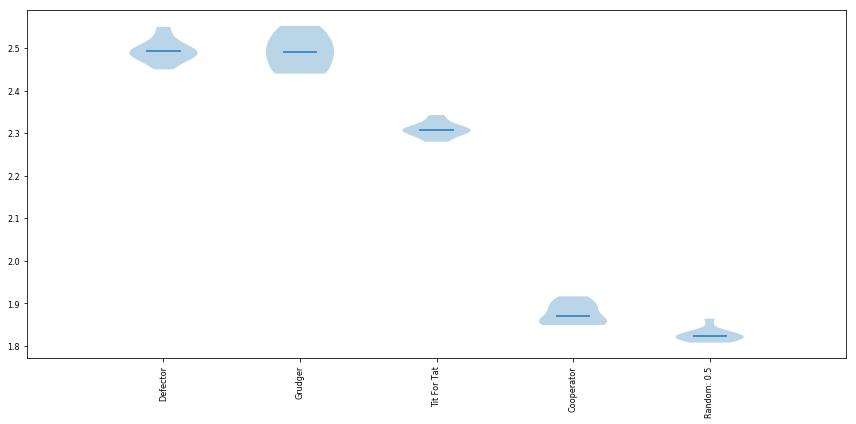

In [58]:
plot = axl.Plot(results)
b = plot.boxplot()

## Win plot Graph

The win plot graph is 

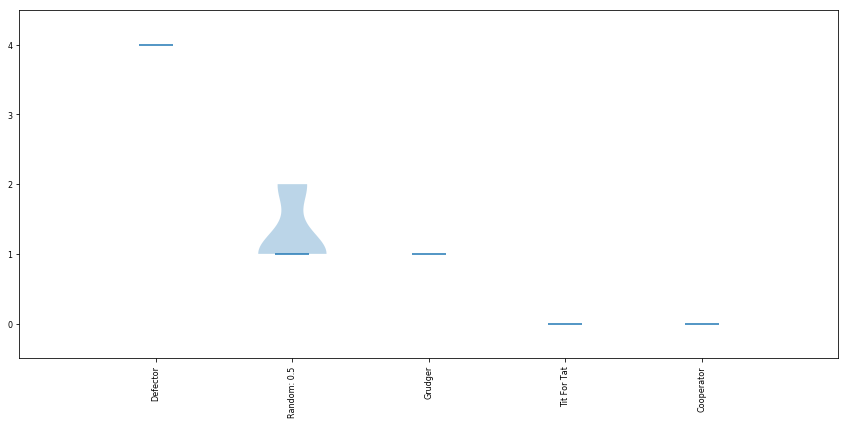

In [53]:
p = plot.winplot()

## Payoff Graph

The payoff graph visualizes performance against other competitors. Brighter colours represent more success. For example, bright yellow indicates that **Defector** does very well against **Cooperator** 

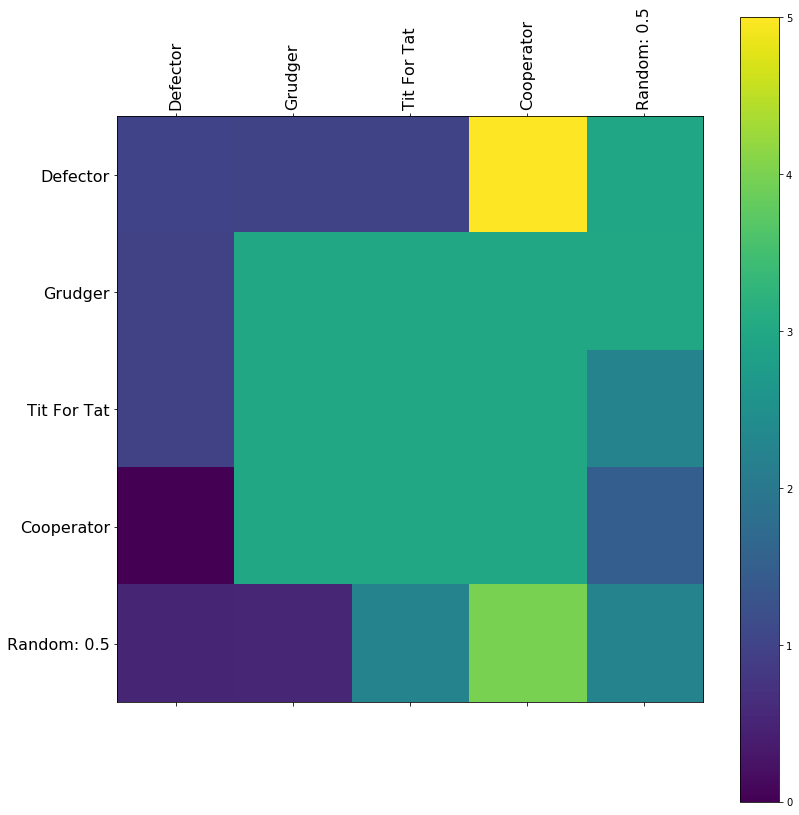

In [40]:
pay = plot.payoff()

# Finally, let's save a copy of our graphs

In [41]:
axl.Plot.save_all_plots(plot)

Obtaining plots: 100%|██████████| 6/6 [00:00<00:00,  7.24it/s]
